In [106]:
import pandas as pd

In [107]:
df = pd.read_csv('..\\Datasets\\student_clustering.csv')
df.shape

(200, 2)

In [108]:
df.head()


,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


Both cgpa and iq are features

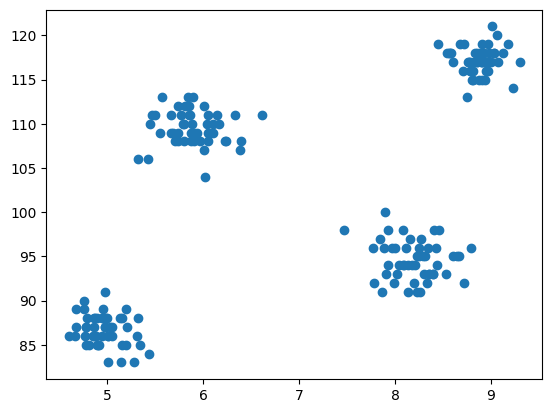

In [109]:
import matplotlib.pyplot as plt

plt.scatter(df['cgpa'],df['iq'])

# Elbow Curve

In [110]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
  km = KMeans(n_clusters=i)
  km.fit(df)
  # km.predict(df)
  wcss.append(km.inertia_)

wcss

[29957.898288,
 4184.14127,
 2503.397581,
 681.9696599999999,
 563.7685674520718,
 412.22876915069065,
 302.6534993582081,
 235.30768874397904,
 202.06818704953466,
 209.67333448260823]

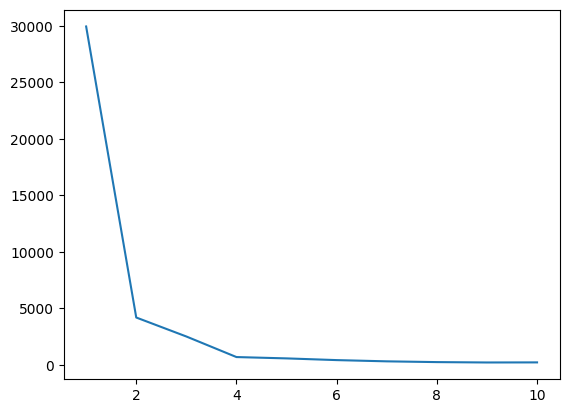

In [111]:
plt.plot(range(1,11),wcss)

# KMeans - 2D Data

In [112]:
X = df.iloc[:,:].values

km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

y_means

array([1, 0, 3, 3, 0, 0, 3, 2, 0, 3, 1, 0, 3, 1, 0, 3, 0, 3, 0, 0, 3, 1,
       3, 1, 1, 3, 1, 2, 3, 0, 2, 0, 2, 0, 3, 3, 2, 0, 1, 0, 1, 3, 3, 1,
       2, 2, 3, 0, 2, 0, 1, 1, 2, 3, 2, 0, 0, 2, 0, 2, 0, 3, 3, 2, 1, 2,
       3, 1, 0, 3, 0, 2, 3, 1, 0, 2, 0, 2, 1, 3, 3, 2, 0, 1, 2, 1, 2, 0,
       2, 0, 2, 2, 3, 1, 3, 3, 2, 3, 1, 2, 0, 1, 1, 2, 1, 1, 3, 1, 2, 2,
       3, 2, 0, 0, 3, 2, 3, 0, 2, 1, 1, 0, 3, 2, 3, 1, 3, 0, 1, 3, 3, 0,
       1, 1, 0, 2, 0, 1, 3, 3, 3, 1, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 2, 2,
       1, 3, 0, 2, 0, 3, 1, 2, 0, 3, 2, 1, 0, 1, 1, 2, 2, 0, 2, 1, 1, 3,
       2, 0, 1, 2, 2, 0, 0, 0, 3, 1, 3, 3, 2, 0, 3, 3, 1, 1, 3, 1, 2, 0,
       0, 2], dtype=int32)

Extracting values

In [113]:
# Returns all the data points whose y_means = 0 i.e that lie in cluster 0

X[y_means == 0]

array([[  5.9 , 113.  ],
       [  5.45, 110.  ],
       [  5.88, 109.  ],
       [  5.79, 110.  ],
       [  6.1 , 110.  ],
       [  5.71, 108.  ],
       [  5.5 , 111.  ],
       [  6.05, 111.  ],
       [  5.84, 113.  ],
       [  5.43, 106.  ],
       [  6.01, 112.  ],
       [  5.32, 106.  ],
       [  5.91, 108.  ],
       [  5.57, 113.  ],
       [  6.4 , 108.  ],
       [  5.67, 109.  ],
       [  6.05, 108.  ],
       [  5.85, 111.  ],
       [  5.87, 109.  ],
       [  6.02, 104.  ],
       [  5.77, 111.  ],
       [  6.06, 109.  ],
       [  5.55, 109.  ],
       [  5.81, 112.  ],
       [  5.47, 111.  ],
       [  5.74, 109.  ],
       [  5.8 , 108.  ],
       [  5.88, 110.  ],
       [  5.91, 109.  ],
       [  5.67, 111.  ],
       [  5.74, 108.  ],
       [  5.69, 109.  ],
       [  6.05, 109.  ],
       [  6.14, 111.  ],
       [  5.74, 112.  ],
       [  5.94, 109.  ],
       [  5.86, 111.  ],
       [  6.38, 107.  ],
       [  6.61, 111.  ],
       [  6.04, 110.  ],


In [114]:
X[y_means == 1,1]   # returns column 1 values of the cluster 1 data points

array([88., 86., 88., 86., 87., 88., 87., 84., 85., 86., 83., 86., 87.,
       85., 83., 88., 85., 88., 86., 91., 86., 88., 89., 86., 90., 87.,
       87., 85., 87., 83., 86., 87., 85., 87., 87., 88., 88., 85., 86.,
       86., 86., 85., 88., 88., 89., 88., 88., 89., 85., 89.])

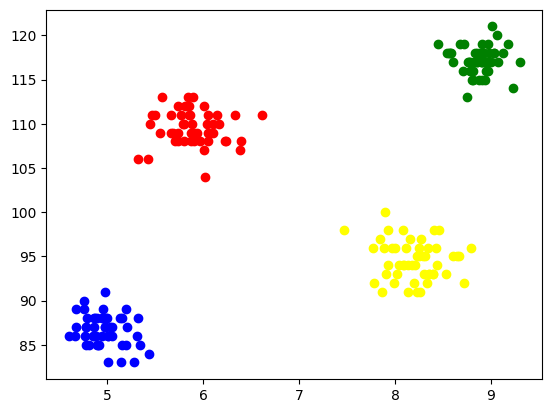

In [115]:
plt.scatter(X[y_means==0,0] , X[y_means==0,1], color='red')
plt.scatter(X[y_means==1,0] , X[y_means==1,1], color='blue')
plt.scatter(X[y_means==2,0] , X[y_means==2,1], color='green')
plt.scatter(X[y_means==3,0] , X[y_means==3,1], color='yellow')

# K-Means - 3D Data

In [116]:
from sklearn.datasets import make_blobs

centroid = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]
X,y = make_blobs(n_samples=200, cluster_std=cluster_std, centers=centroid, n_features=3,random_state=1)

In [117]:
df = pd.DataFrame()
df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['target'] = y
df

,col1,col2,col3,target
0,4.334245,3.325804,-4.174970,1
1,-3.322467,3.221711,-4.625342,3
2,-6.072969,-4.134592,2.698461,0
3,6.904659,6.111057,-4.340950,1
4,-2.608392,2.950156,-2.234665,3
...,...,...,...,...
195,4.712692,5.680070,-5.319802,1
196,-4.137450,6.458603,-3.351356,3
197,-5.208894,-4.413377,5.838983,0
198,2.619422,-2.779098,5.622849,2


In [118]:
import plotly.express as px
# fig = px.scatter_3d(x=X[:,0],y=X[:,1],z=X[:,2])
fig = px.scatter_3d(x=df.iloc[:,0],y=df.iloc[:,1],z=df.iloc[:,2])
fig.show()

In [119]:
wcss = []

for i in range(1,21):
  km=KMeans(n_clusters=i)
  y_means=km.fit_predict(df.iloc[:,0:3])
  wcss.append(km.inertia_)
y_means

array([15,  7,  6,  9,  8, 16,  6, 18,  6, 10,  6, 15, 11,  7, 12,  8,  5,
       19,  2, 19, 11,  5,  3, 11,  6, 15,  7,  4,  9,  8, 17,  1, 15,  6,
        8, 16,  0, 18,  5,  4,  0, 18,  6, 16,  3, 19,  4, 12, 18, 13,  1,
        4, 14,  8, 13,  6,  8,  5,  4,  1, 13,  3,  7,  3,  2, 11,  5,  9,
        0,  8,  5, 12, 10, 10,  0, 10,  1,  9,  0, 19,  7,  0, 18, 18, 11,
        8, 10,  6,  6,  7, 16,  3,  3,  2, 18, 11,  0, 15,  6,  6, 16,  0,
        0, 10,  8,  7,  8,  2,  4,  7,  2, 10,  2,  8,  4,  8, 13,  8, 14,
       15,  6,  9,  5,  2, 18,  6,  4, 15,  4, 13, 19,  0,  7,  0, 15, 14,
        5, 16,  8,  8, 13, 12, 12,  7, 11,  9, 15,  0, 18,  9,  8, 10, 19,
       19,  1,  4,  6, 18,  5, 16, 15, 13,  6,  5,  2,  0,  0, 17, 19,  6,
       10, 13, 10,  4, 10, 15,  3,  5, 19, 13,  3, 18,  5,  4,  2, 13,  7,
        0, 12,  1,  7,  7, 10, 14,  2, 10,  8,  0, 14, 18], dtype=int32)

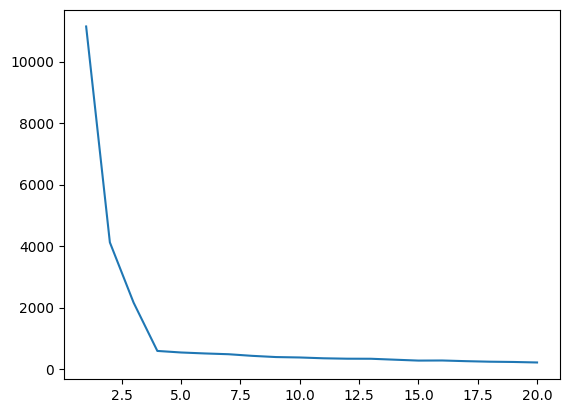

In [120]:
plt.plot(range(1,21), wcss)

In [122]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(df.iloc[:,0:3])

In [124]:
fig = px.scatter_3d(df,x='col1',y='col2',z='col3', color='target')
fig.show()